# 3 Regression models

In [1]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [2]:
#import libraries
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [3]:
#Read in the ccombined data
finnish = pd.read_csv("finnish_data_combined.csv")
irish = pd.read_csv("irish_data_combined.csv")
irish.pop("Unnamed: 0")
finnish.pop("Unnamed: 0")

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
Name: Unnamed: 0, dtype: int64

## Correlation and linear regression

In [4]:
correlation = irish.corr()
print(correlation)

                               House Construction Cost Index  No. of Units  \
House Construction Cost Index                       1.000000      0.994114   
No. of Units                                        0.994114      1.000000   
Year                                                0.965964      0.963084   

                                   Year  
House Construction Cost Index  0.965964  
No. of Units                   0.963084  
Year                           1.000000  


In [5]:
# Pearson's correlation coefficient: Irish data
np.corrcoef(irish["House Construction Cost Index"], irish["No. of Units"])

array([[1.        , 0.99411428],
       [0.99411428, 1.        ]])

In [6]:
# Pearson's correlation coefficient: Irish data
np.corrcoef(irish["Year"], irish["No. of Units"])

array([[1.        , 0.96308419],
       [0.96308419, 1.        ]])

In [7]:
correlation = finnish.corr()
print(correlation)

                                            Year     Total    Labour  \
Year                                    1.000000  0.985760  0.984753   
Total                                   0.985760  1.000000  0.988860   
Labour                                  0.984753  0.988860  1.000000   
Materials                               0.975261  0.996466  0.974269   
Services                                0.978155  0.978536  0.965056   
Residential buildings completion (No.)  0.602826  0.559865  0.527928   

                                        Materials  Services  \
Year                                     0.975261  0.978155   
Total                                    0.996466  0.978536   
Labour                                   0.974269  0.965056   
Materials                                1.000000  0.968573   
Services                                 0.968573  1.000000   
Residential buildings completion (No.)   0.570757  0.564205   

                                        Residential b

In [8]:
# Pearson's correlation coefficient: Finnish data
np.corrcoef(finnish["Total"], finnish["Residential buildings completion (No.)"])

array([[1.        , 0.55986543],
       [0.55986543, 1.        ]])

In [9]:
# Pearson's correlation coefficient: Finnish data
np.corrcoef(finnish["Year"], finnish["Residential buildings completion (No.)"])

array([[1.        , 0.60282582],
       [0.60282582, 1.        ]])

### Finnish data linear regression: cost index

In [10]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Total"]

In [11]:
finnish.shape

(28, 6)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

In [13]:
X_train

17    152.3
27    185.0
1     102.7
20    156.1
16    148.7
14    142.3
18    153.8
25    162.1
24    162.6
19    155.3
8     118.7
10    126.0
23    160.9
3     107.6
22    157.4
21    156.9
12    138.5
11    130.7
15    143.9
Name: Total, dtype: float64

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19,)
(9,)
(19,)
(9,)


In [15]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
y_train

array([[33613],
       [41452],
       [21372],
       [27453],
       [33324],
       [22043],
       [30110],
       [38543],
       [42602],
       [29157],
       [30082],
       [33221],
       [42456],
       [30529],
       [35134],
       [30012],
       [35243],
       [33562],
       [25066]])

In [18]:
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [19]:

y_test

array([[-0.50282005],
       [-0.0101885 ],
       [-1.30851962],
       [ 0.43271263],
       [ 0.10095398],
       [-0.90316662],
       [ 0.80919528],
       [-0.30540029],
       [-0.22913586]])

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
#predictions
y_preds_train = lm.predict(X_train)
y_preds_test = lm.predict(X_test)

In [22]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(lm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.32459040446670795
R-squared of the model in test set is: -0.1650530252947524
Root mean squared error of the prediction is: [0.66057027]
Mean absolute percentage error of the prediction is: 1080.0678989667922


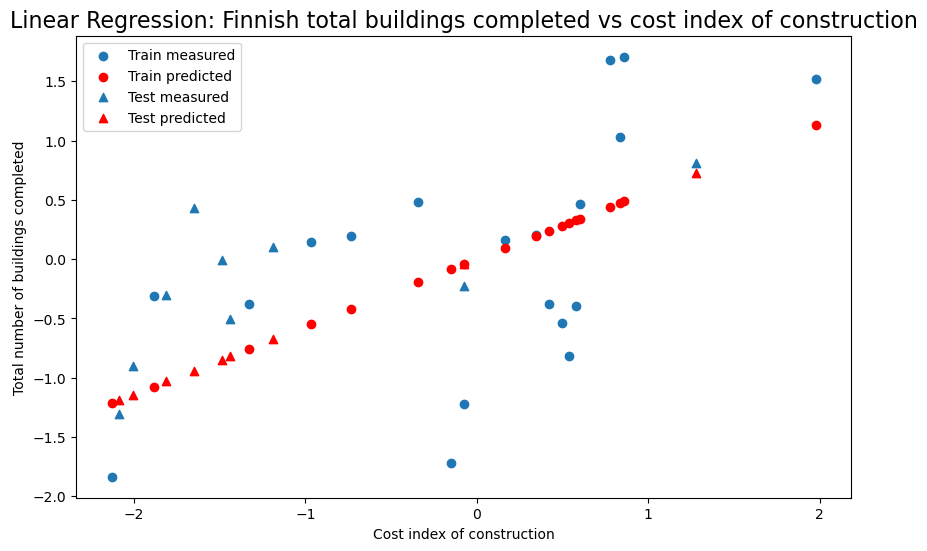

In [23]:
plt.figure(figsize=(10, 6))
plt.title("Linear Regression: Finnish total buildings completed vs cost index of construction", size=16)
tt = plt.scatter(X_train, y_train)
tp = plt.scatter(X_train, y_preds_train, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of buildings completed")
xt = plt.scatter(X_test, y_test, marker = "^", c="C0")
xp = plt.scatter(X_test, y_preds_test, c="red", marker = "^")
plt.legend((tt, tp, xt, xp),('Train measured', 'Train predicted', 'Test measured', 'Test predicted'))
plt.show()

### Finnish data linear regression: year

In [24]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Year"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

In [26]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
#predictions
y_preds_train = lm.predict(X_train)
y_preds_test = lm.predict(X_test)

In [31]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(lm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.37626958420279355
R-squared of the model in test set is: -0.18199214273615616
Root mean squared error of the prediction is: [0.66535507]
Mean absolute percentage error of the prediction is: 1103.019679250297


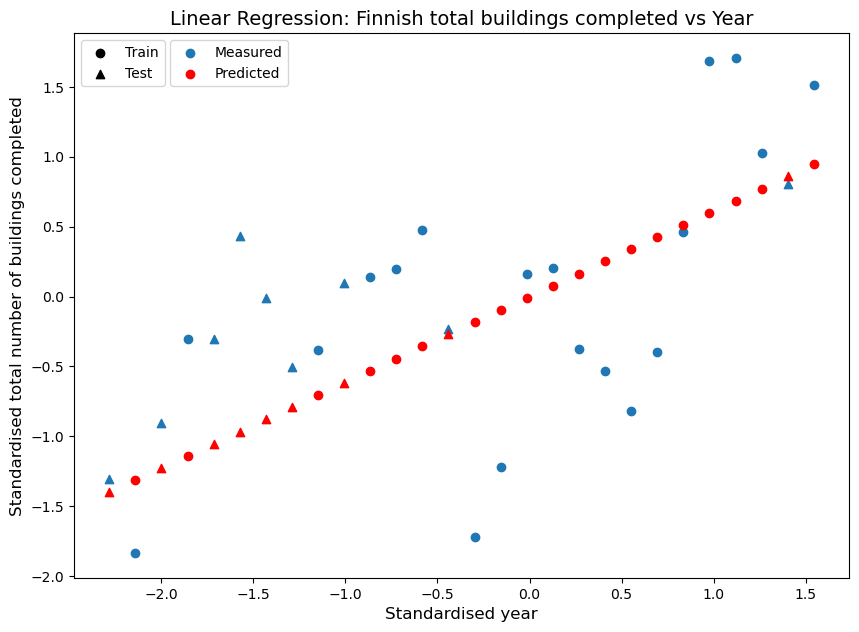

In [32]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Linear Regression: Finnish total buildings completed vs Year", size=14)
tt = plt.scatter(X_train, y_train)
tp = plt.scatter(X_train, y_preds_train, c="red")
xt = plt.scatter(X_test, y_test, marker = "^", c="C0")
xp = plt.scatter(X_test, y_preds_test, c="red", marker = "^")
plt.xlabel("Standardised year", size = 12)
plt.ylabel("Standardised total number of buildings completed", size = 12)
legend1 = plt.legend((tt, xt),('Train', 'Test'))
legend1.legendHandles[0].set_color('black')
legend1.legendHandles[1].set_color('black')
plt.legend((tt, tp),('Measured', 'Predicted'), loc = "upper center", bbox_to_anchor=(0.2, 1))
plt.gca().add_artist(legend1)
plt.show()

### Finnish data: Ridge Regression with GridSearchCV

In [33]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [36]:
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10, 100]}, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [37]:
ridge

Ridge(alpha=1)

In [38]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.37532891024228654
R-squared of the model in test set is: -0.06483862327842438
Root mean squared error of the prediction is: [0.63152141]
Mean absolute percentage error of the prediction is: 1045.0909175100053


### Finnish data:  Lasso regression with GridSearchCV

In [39]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10, 100]}, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [40]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

R-squared of the model in training set is: 0.36626958420279365
R-squared of the model in test set is: 0.15572100532596278
Root mean squared error of the prediction is: [0.7594178  0.80464304 1.13765553 0.85368372 0.68338622 1.01798578
 1.11576733 0.90592043 0.61213141]
Mean absolute percentage error of the prediction is: 1014.6883513601858


### Finnish data:  Decision Tree regression

In [41]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred_DT_test = DTregressor.predict(X_test)
y_pred_DT_train = DTregressor.predict(X_train)

In [43]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT_test)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT_test) / y_test)) * 100))

R-squared of the model in training set is: 1.0
R-squared of the model in test set is: 0.3721148393214707
Root mean squared error of the prediction is: [0.63473922 0.63473922 1.73355001 0.61914006 0.63473922 0.61914006
 1.38600706 0.61914006 0.92444763]
Mean absolute percentage error of the prediction is: 829.3951833952051


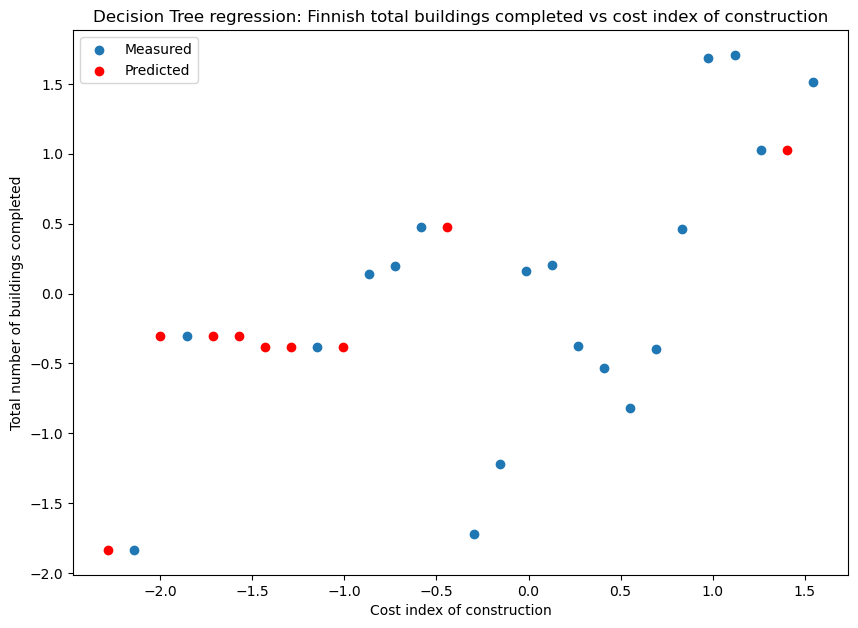

In [44]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Decision Tree regression: Finnish total buildings completed vs cost index of construction", size=12)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred_DT_test, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()

### Finnish data:  Random Forest regression

In [45]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
y_pred_random_test = regressor.predict(X_test)
y_pred_random_train = regressor.predict(X_train)

In [47]:
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random_test)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9368440933001487
R-squared of the model in test set is: 0.6121885762151622
Root mean squared error of the prediction is: [0.61352911 0.61586077 1.18890612 0.64409938 0.6174126  0.69607411
 1.5437     0.69607411 0.61392993]
Mean absolute percentage error of the prediction is: 723.4738700757781


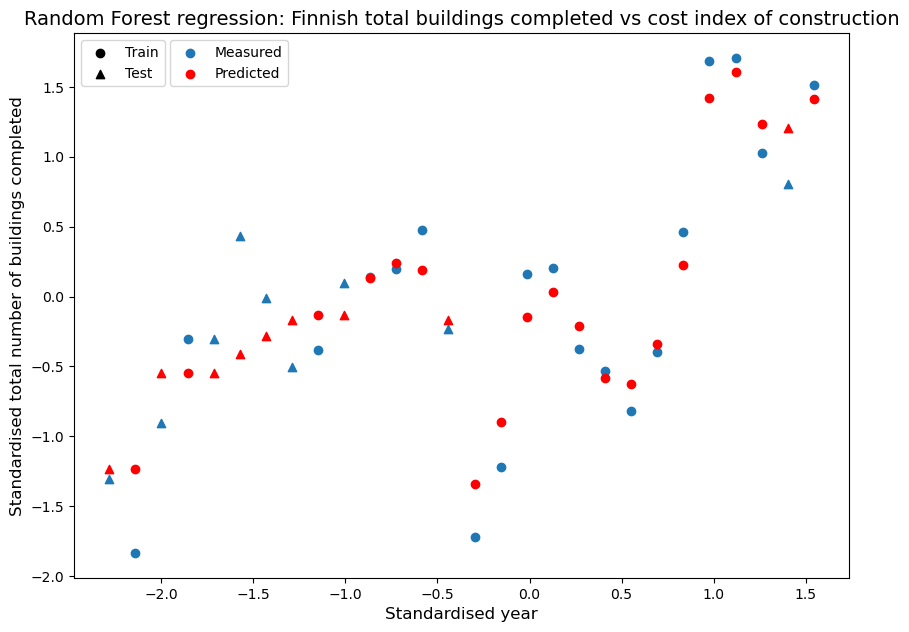

In [48]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Random Forest regression: Finnish total buildings completed vs cost index of construction", size=14)
tt = plt.scatter(X_train, y_train)
tp = plt.scatter(X_train, y_pred_random_train, c="red")
xt = plt.scatter(X_test, y_test, marker = "^", c="C0")
xp = plt.scatter(X_test, y_pred_random_test, c="red", marker = "^")
plt.xlabel("Standardised year", size = 12)
plt.ylabel("Standardised total number of buildings completed", size= 12)
legend1 = plt.legend((tt, xt),('Train', 'Test'))
legend1.legendHandles[0].set_color('black')
legend1.legendHandles[1].set_color('black')
plt.legend((tt, tp),('Measured', 'Predicted'), loc = "upper center", bbox_to_anchor=(0.2, 1))
plt.gca().add_artist(legend1)
plt.show()

### Irish data linear regression: cost index

In [49]:
irish.head()

,Quarter,House Construction Cost Index,No. of Units,Year
0,q1_2018,212.513233,14816.0,2018
1,q1_2019,214.525667,20324.0,2019
2,q1_2021,218.490518,34511.0,2021
3,q2_2018,213.003957,16351.0,2018
4,q2_2019,215.117876,22139.0,2019


In [50]:
y = irish['No. of Units']
X = irish["House Construction Cost Index"]

In [51]:
X_train = X.values.reshape(-1,1)
y_train = y.values.reshape(-1,1)

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
#predictions
y_preds_train = lm.predict(X_train)

In [54]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))

R-squared of the model in training set is: 0.9882631960663407


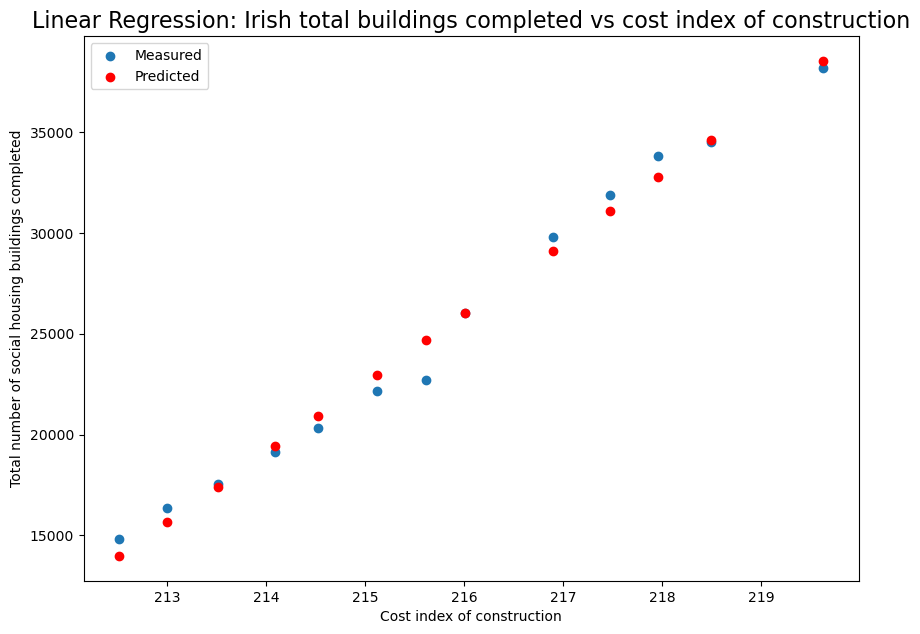

In [55]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Linear Regression: Irish total buildings completed vs cost index of construction", size=16)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_preds_train, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of social housing buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()

# References

datetime — Basic date and time types (2023). python.org. url: https://docs.python.org/3/
library/datetime.html (visited on 05/25/2023).

What Is ARIMA Modeling? (2023). Master’s in Data Science. url: https://www.mastersindatas
cience.org/learning/statistics-data-science/what-is-arima-modeling/ (visited
on 05/11/2023).

Augmented Dickey-Fuller Test in Python (With Example) (2023). Statology. url: https://www.
statology.org/dickey-fuller-test-python/ (visited on 05/11/2023).

Raval, P. (2023). How to Build ARIMA Model in Python for time series forecasting? ProjectPro. url:
https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
(visited on 05/11/2023).

Nadeem (2021). ARIMA: Advanced Time Series Methods: Auto Regression Integrated Moving Average.
Medium. url: https://medium.com/analytics-vidhya/arima-fc1f962c22d4 (visited on
05/11/2023).

How to do cross validation for time series? (2023). ProjectPro. url: https://www.projectpro.
io/recipes/do-cross-validation-for-time-series (visited on 05/11/2023).

Shrivastava, S. (2020). Cross Validation in Time Series. Medium. url: https://medium .com /
@soumyachess1496 / cross - validation - in - time - series - 566ae4981ce4 (visited on
05/11/2023).

Hyndman, R. J. and G. Athanasopoulos (2018). Forecasting: Principles and Practice. Melbourne,
Australia: OTexts.

Population on 1 January (2023). eurostat. url: https://ec.europa.eu/eurostat/databrowse
r/view/TPS00001/default/table?lang=en (visited on 05/16/2023).

Dash in 20 Minutes (2023). plotly. url: https : / / dash . plotly . com / tutorial (visited on
05/25/2023).